In [2]:
i1 = 0.2
U1up = [-1.009, -1.729, -2.383, -2.863, -3.154, -3.366, -3.403]
I    = [0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.56]

i2 = 0.3
U2up = [-1.508, -2.636, -3.590, -4.322, -4.772, -5.091, -5.144]
U2dn = [-1.574, -2.720, -3.717, -4.393, -4.815, -5.104, -5.144]

i3 = 0.4
U03 = -0.542
U3up = [-2.093, -3.520, -4.764, -5.730, -6.347, -6.774, -6.832]
U3dn = [-2.145, -3.666, -4.903, -5.856, -6.405, -6.772, -6.832]

i4 = 0.5
U04 = -0.685
U4up = [-2.515, -4.371, -5.989, -7.164, -7.935, -8.445, -8.525]
U4dn = [-2.637, -4.494, -6.168, -7.325, -7.981, -8.457, -8.525]

i5 = 0.6
U05 = -0.803
U5up = [-3.031, -5.199, -7.189, -8.579, -9.463, -10.102, -10.190]
U5dn = [-3.066, -5.282, -7.335, -8.755, -9.580, -10.117, -10.190]

i6 = 0.7
U06 = -0.849
U6up = [-3.421, -6.144, -8.257, -10.001, -10.959, -11.730, -11.803]
U6dn = [-3.525, -6.336, -8.477, -10.207, -11.043, -11.730, -11.803]

i7 = 0.8
U07 = -0.965
U7up = [-3.869, -6.840, -9.367, -11.242, -12.462, -13.282, -13.363]
U7dn = [-4.170, -6.858, -9.661, -11.441, -12.536, -13.264, -13.363]

i8 = 0.9
U08 = -1.089
U8up = [-4.377, -7.655, -10.576, -12.623, -13.912, -14.887, -15.030]
U8dn = [-4.465, -7.971, -10.907, -12.844, -14.062, -14.885, -15.030]

i9 = 1
U09 = -1.2
U9up = [-5.054, -8.569, -11.801, -14.095, -15.583, -16.605, -16.705]
U9dn = [-5.016, -8.940, -12.056, -14.311, -15.709, -16.616, -16.705]

In [3]:
# после переворота:
i10 = 1
U010 = -0.575

U10up = [3.046, 6.841,  9.953, 12.284, 13.806, 14.864, 14.988]
U10dn = [3.464, 7.139, 10.304, 12.617, 13.899, 14.877, 14.988]

In [4]:
U35 = 75.8

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.stats import linregress
from math import sqrt
import json


In [6]:
# 1) Если у вас есть калибровочные данные (IM_cal в A, B_cal в Tesla), вставьте их сюда.
# Пример:
# IM_cal = np.array([0.0, 0.5, 1.0, 1.5])
# B_cal  = np.array([0.0, 0.052, 0.103, 0.155])
IM_cal = np.array([0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.56])
B_cal  = np.array([265, 505, 740, 910, 1040, 1103, 1126])

# 2) Если калибровки нет — используется линейная аппроксимация B = B_coef_default * I
B_coef_default = 0.10  # Тесла на Ампер — замените на свой коэффициент

# 3) Геометрические и электрические параметры образца:
t = 0.002        # толщина образца, м (пример: 0.5 мм)
sigma0 = 1e4      # удельная проводимость, 1/Ом·м (пример)
rho0 = 1.0 / sigma0

# 4) Масштаб напряжений (если данные в мВ → 1e-3)
u_scale = 1e-3


In [14]:
# Ток электромагнита (A)
I_magnet = np.array([0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.56])

# Токи через образец
i_values = np.array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

# Измеренные напряжения (мВ)
U1up = np.array([-1.009, -1.729, -2.383, -2.863, -3.154, -3.366, -3.403])
U1dn = np.array([-1.079, -1.803, -2.420, -2.914, -3.208, -3.408, -3.495])
U01  = -0.270
U2up = np.array([-1.508, -2.636, -3.590, -4.322, -4.772, -5.091, -5.144])
U2dn = np.array([-1.574, -2.720, -3.717, -4.393, -4.815, -5.104, -5.144])
U02  = -0.411
U3up = np.array([-2.093, -3.520, -4.764, -5.730, -6.347, -6.774, -6.832])
U3dn = np.array([-2.145, -3.666, -4.903, -5.856, -6.405, -6.772, -6.832])
U03 = -0.542
U4up = np.array([-2.515, -4.371, -5.989, -7.164, -7.935, -8.445, -8.525])
U4dn = np.array([-2.637, -4.494, -6.168, -7.325, -7.981, -8.457, -8.525])
U04 = -0.685
U5up = np.array([-3.031, -5.199, -7.189, -8.579, -9.463, -10.102, -10.190])
U5dn = np.array([-3.066, -5.282, -7.335, -8.755, -9.580, -10.117, -10.190])
U05 = -0.803
U6up = np.array([-3.421, -6.144, -8.257, -10.001, -10.959, -11.730, -11.803])
U6dn = np.array([-3.525, -6.336, -8.477, -10.207, -11.043, -11.730, -11.803])
U06 = -0.849
U7up = np.array([-3.869, -6.840, -9.367, -11.242, -12.462, -13.282, -13.363])
U7dn = np.array([-4.170, -6.858, -9.661, -11.441, -12.536, -13.264, -13.363])
U07 = -0.965
U8up = np.array([-4.377, -7.655, -10.576, -12.623, -13.912, -14.887, -15.030])
U8dn = np.array([-4.465, -7.971, -10.907, -12.844, -14.062, -14.885, -15.030])
U08 = -1.089
U9up = np.array([-5.054, -8.569, -11.801, -14.095, -15.583, -16.605, -16.705])
U9dn = np.array([-5.016, -8.940, -12.056, -14.311, -15.709, -16.616, -16.705])
U09 = -1.200

# Собираем все наборы в список
datasets = [
    {'i': 0.2, 'Uup': U1up, 'Udn': U1dn,   'U0': U01},
    {'i': 0.3, 'Uup': U2up, 'Udn': U2dn,   'U0': U02},
    {'i': 0.4, 'Uup': U3up, 'Udn': U3dn,   'U0': U03},
    {'i': 0.5, 'Uup': U4up, 'Udn': U4dn,   'U0': U04},
    {'i': 0.6, 'Uup': U5up, 'Udn': U5dn,   'U0': U05},
    {'i': 0.7, 'Uup': U6up, 'Udn': U6dn,   'U0': U06},
    {'i': 0.8, 'Uup': U7up, 'Udn': U7dn,   'U0': U07},
    {'i': 0.9, 'Uup': U8up, 'Udn': U8dn,   'U0': U08},
    {'i': 1.0, 'Uup': U9up, 'Udn': U9dn,   'U0': U09},
]


Используется интерполяция по заданным IM_cal / B_cal.


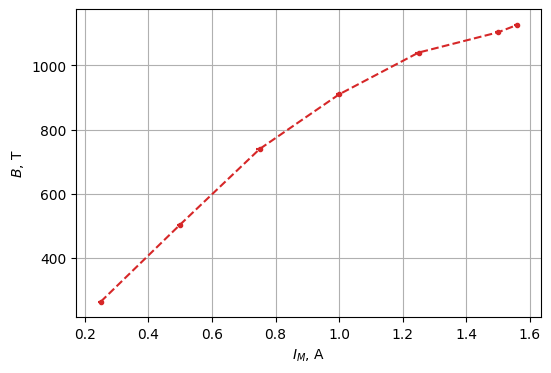

Коэффициент наклона: k = 6.419e+02 ± 6.025e+01 T/A
Свободный член: b = 1.883e+02 T
Коэффициент детерминации: R² = 0.95781
📈 B = (641.89 ± 60.25)·I + (188.25 ± 53.05)
R² = 0.95781


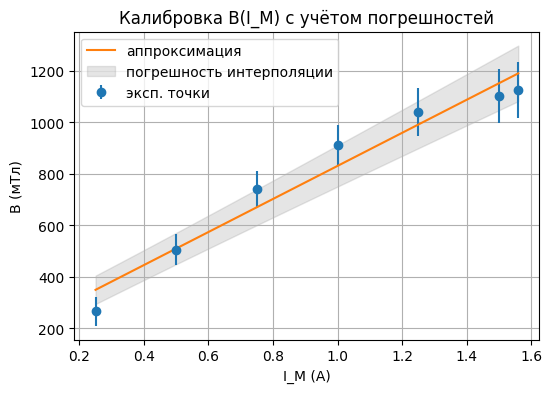

In [15]:
# --- проверка и интерполяция ---
if IM_cal is not None and B_cal is not None:
    B_of_I = interp1d(IM_cal, B_cal, kind='linear', fill_value='extrapolate')
    print("Используется интерполяция по заданным IM_cal / B_cal.")
else:
    print("Калибровка B(IM) не задана — используется приближение B = B_coef_default * I.")
    B_of_I = lambda x: B_coef_default * np.array(x, dtype=float)

# --- построение экспериментальных данных ---
I_plot = np.linspace(min(I_magnet), max(I_magnet), 200)
B_plot = B_of_I(I_plot)

# --- аппроксимация прямой ---
slope_BI, intercept_BI, r_BI, p_BI, std_err_BI = linregress(I_magnet, B_of_I(I_magnet))

# --- построение графика ---
plt.figure(figsize=(6,4))
plt.scatter(I_magnet, B_of_I(I_magnet), color='tab:blue', s=0, label='эксп. точки', linestyle = '--')
# plt.plot(I_plot, slope_BI * I_plot + intercept_BI, color='tab:red', linestyle='--',
        #  label=f'аппроксимация: B = ({slope_BI:.3e} ± {std_err_BI:.1e})·I + ({intercept_BI:.2e})')
plt.errorbar(I_magnet, B_of_I(I_magnet), xerr = 0.01, yerr = 5,
                 fmt='o', color='tab:red', label='', ms=3, linestyle = '--')
plt.xlabel(r'$I_M$, A')
plt.ylabel(r'$B$, T')
# plt.title(r'Калибровочный график $B(I_M)$')
plt.grid(True)
# plt.legend()
plt.show()

# --- вывод результатов ---
print(f"Коэффициент наклона: k = {slope_BI:.3e} ± {std_err_BI:.3e} T/A")
print(f"Свободный член: b = {intercept_BI:.3e} T")
print(f"Коэффициент детерминации: R² = {r_BI**2:.5f}")

# Линейная регрессия
slope_BI, intercept_BI, r_BI, p_BI, std_err_BI = linregress(IM_cal, B_cal)

# Расчёт ошибок коэффициентов
n = len(IM_cal)
mean_x = np.mean(IM_cal)
Sxx = np.sum((IM_cal - mean_x)**2)
sigma_a = std_err_BI  # погрешность наклона
sigma_b = std_err_BI * np.sqrt(np.sum(IM_cal**2) / (n * Sxx))  # погрешность свободного члена

print(f"📈 B = ({slope_BI:.2f} ± {sigma_a:.2f})·I + ({intercept_BI:.2f} ± {sigma_b:.2f})")
print(f"R² = {r_BI**2:.5f}")
I_plot = np.linspace(min(IM_cal), max(IM_cal), 200)
B_plot = slope_BI * I_plot + intercept_BI
B_err = np.sqrt((I_plot * sigma_a)**2 + sigma_b**2)
B_err = np.array(B_err)

plt.figure(figsize=(6,4))
plt.errorbar(IM_cal, B_cal, yerr=np.sqrt((IM_cal * sigma_a)**2 + sigma_b**2), fmt='o', label='эксп. точки')
plt.plot(I_plot, B_plot, '-', label='аппроксимация')
plt.fill_between(I_plot, B_plot - B_err, B_plot + B_err, color='gray', alpha=0.2, label='погрешность интерполяции')
plt.xlabel('I_M (A)')
plt.ylabel('B (мТл)')
plt.title('Калибровка B(I_M) с учётом погрешностей')
plt.legend()
plt.grid(True)
plt.show()



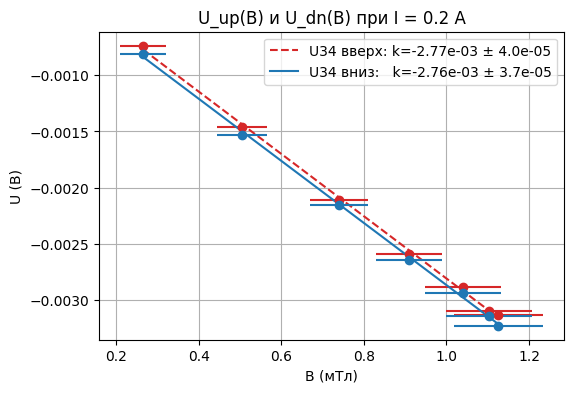

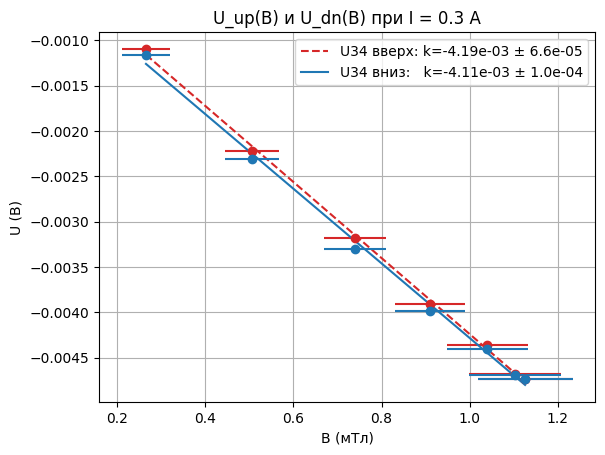

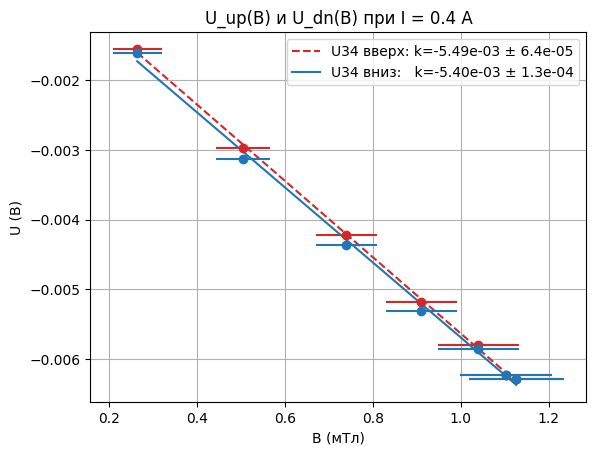

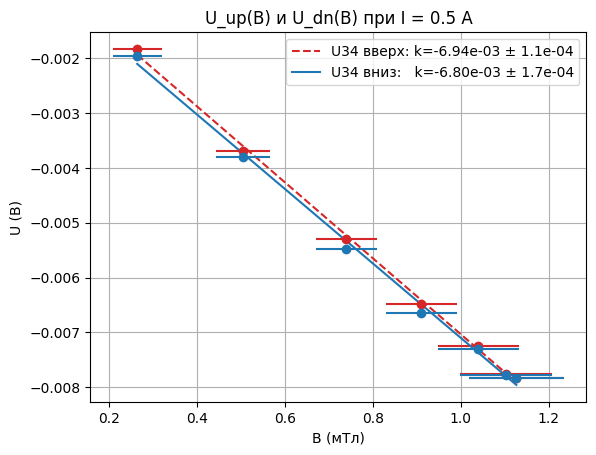

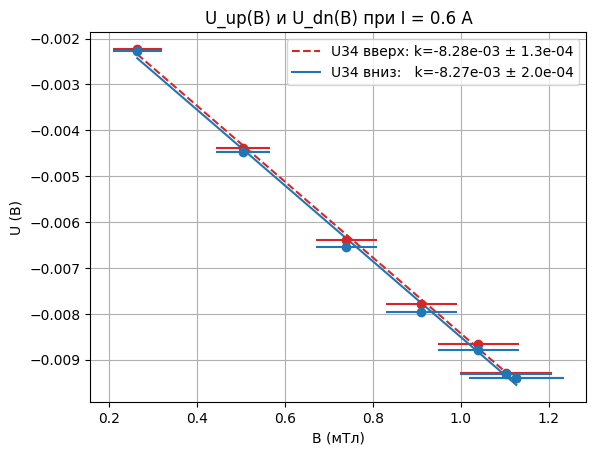

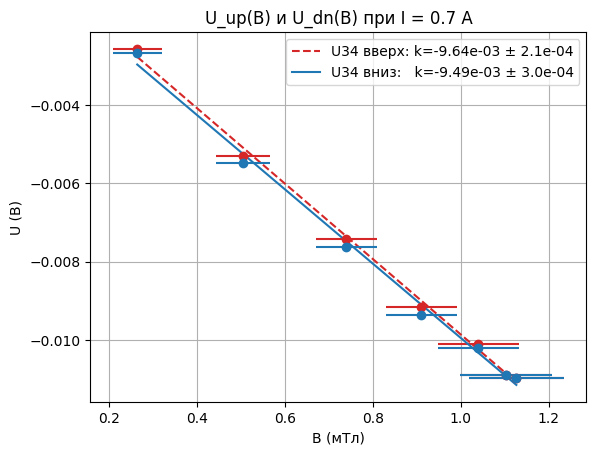

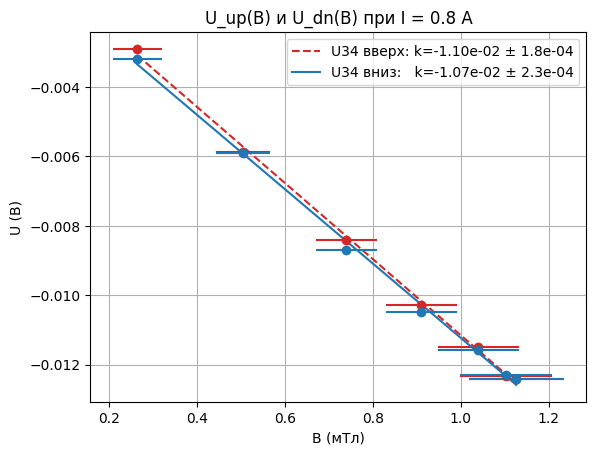

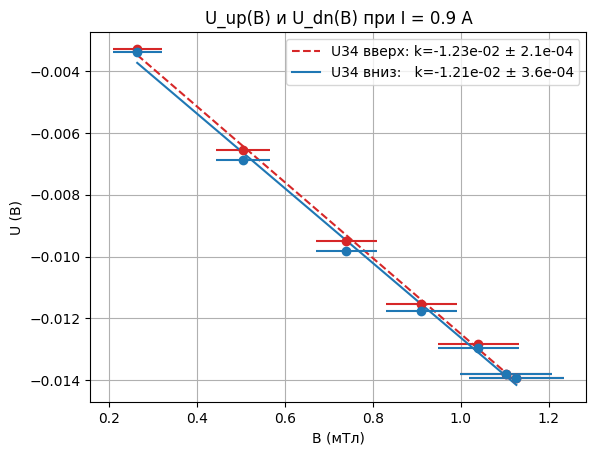

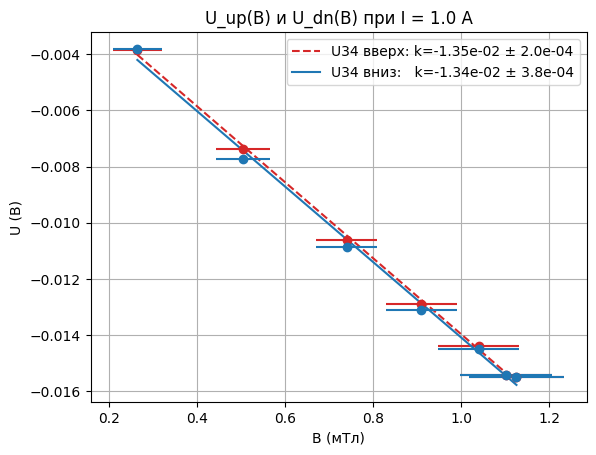

In [ ]:
results = []

plt.figure(figsize=(6,4))

for ds in datasets:
    i_sample = ds['i']
    Uup = (np.array(ds['Uup']) - ds['U0']) * u_scale
    Udn = (np.array(ds['Udn']) - ds['U0']) * u_scale
    B_vals = B_of_I(I_magnet) * 1e-3
    B_err_exp = np.sqrt((I_magnet * sigma_a)**2 + sigma_b**2) * 1e-3  # длина = len(I_magnet)



    # ---- U_up(B)
    slope_up, intercept_up, r_value_up, p_value_up, std_err_up = linregress(B_vals, Uup)
    plt.errorbar(B_vals, Uup, xerr=B_err_exp, yerr=0.001*u_scale,
                 fmt='o', color='tab:red')
    plt.plot(B_vals, slope_up*B_vals + intercept_up, '--', color='tab:red',
             label=f'U34 вверх: k={slope_up:.2e} ± {std_err_up:.1e}')

    # ---- U_dn(B)
    slope_dn, intercept_dn, r_value_dn, p_value_dn, std_err_dn = linregress(B_vals, Udn)
    plt.errorbar(B_vals, Udn, xerr=B_err_exp, yerr=0.001*u_scale,
                 fmt='o', color='tab:blue')
    plt.plot(B_vals, slope_dn*B_vals + intercept_dn, '-', color='tab:blue',
             label=f'U34 вниз:   k={slope_dn:.2e} ± {std_err_dn:.1e}')

    results.append({
        'i': i_sample,
        'k_up': slope_up, 'k_up_err': std_err_up,
        'k_dn': slope_dn, 'k_dn_err': std_err_dn
    })

    plt.xlabel('B (мТл)')
    plt.ylabel('U (В)')
    plt.title(f'U_up(B) и U_dn(B) при I = {i_sample} A')
    plt.grid(True)
    plt.legend()
plt.show()


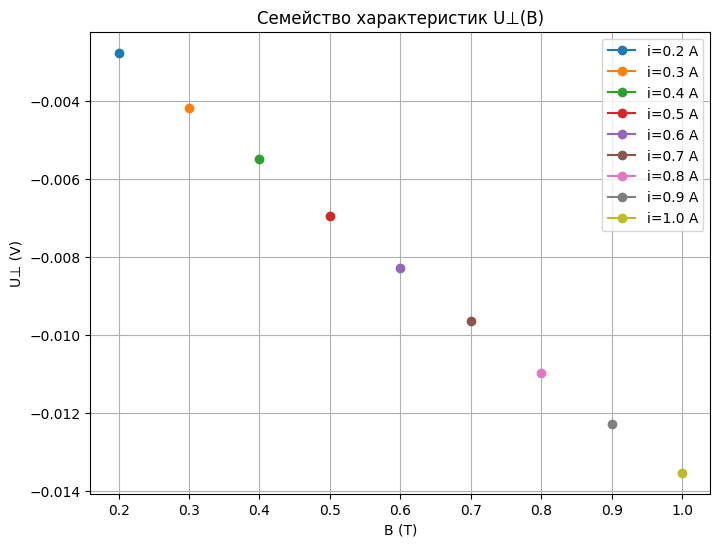

In [10]:
plt.figure(figsize=(8,6))
for r in results:
    plt.plot(r['i'], r['k_up'], 'o-', label=f'i={r["i"]} A')
plt.xlabel('B (T)')
plt.ylabel('U⊥ (V)')
plt.title('Семейство характеристик U⊥(B)')
plt.legend()
plt.grid(True)
plt.show()


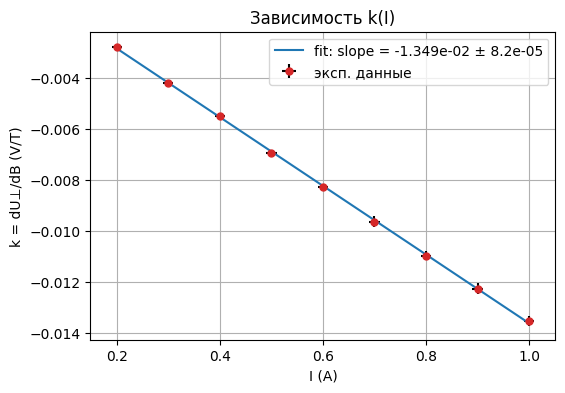

Наклон зависимости k(I): (-1.349e-02 ± 8.178e-05) (V/T)/A
R² = 0.9997


In [11]:
# --- исходные данные ---
i_list = np.array([r['i'] for r in results])
k_list = np.array([r['k_up'] for r in results])
k_err_list = np.array([r['k_up_err'] for r in results])

# --- линейная аппроксимация k(I) ---
slope_kI, intercept_kI, r_kI, p_kI, std_err_kI = linregress(i_list, k_list)

# --- построение графика ---
plt.figure(figsize=(6,4))
plt.errorbar(i_list, k_list, xerr=0.01, yerr=k_err_list, fmt='o', color='tab:red',
             ecolor='black', ms=5,
             label='эксп. данные')

# теоретическая прямая
i_lin = np.linspace(min(i_list), max(i_list), 100)
plt.plot(i_lin, slope_kI*i_lin + intercept_kI, '-', color='tab:blue',
         label=f'fit: slope = {slope_kI:.3e} ± {std_err_kI:.1e}')

# оформление
plt.xlabel('I (A)')
plt.ylabel('k = dU⊥/dB (V/T)')
plt.title('Зависимость k(I)')
plt.legend()
plt.grid(True)
plt.show()

# --- вывод результатов ---
print(f"Наклон зависимости k(I): ({slope_kI:.3e} ± {std_err_kI:.3e}) (V/T)/A")
print(f"R² = {r_kI**2:.4f}")


In [12]:
# Постоянная Холла (формула R_H = slope_kI * t)
R_H = slope_kI * t
R_H_err = std_err_kI * t

e = 1.602176634e-19
n = 1.0 / (R_H * e)
n_err = n * R_H_err / (R_H)

mu_si = abs(R_H) * sigma0
mu_si_err = R_H_err * sigma0
mu_cgs = mu_si * 1e4
mu_cgs_err = mu_si_err * 1e4

print(f"R_H = {R_H:.3e} ± {R_H_err:.3e} м³/Кл")
print(f"n = {abs(n):.3e} ± {abs(n_err):.3e} м⁻³")
print(f"ρ₀ = {rho0:.3e} Ом·м, σ₀ = {sigma0:.3e} 1/Ом·м")
print(f"μ = {mu_si:.3e} ± {mu_si_err:.3e} м²/(В·с) = {mu_cgs:.3e} ± {mu_cgs_err:.3e} см²/(В·с)")


R_H = -2.699e-05 ± 1.636e-07 м³/Кл
n = 2.313e+23 ± 1.402e+21 м⁻³
ρ₀ = 1.000e-04 Ом·м, σ₀ = 1.000e+04 1/Ом·м
μ = 2.699e-01 ± 1.636e-03 м²/(В·с) = 2.699e+03 ± 1.636e+01 см²/(В·с)


In [13]:
def convert(obj):
    try: return float(obj)
    except: return str(obj)

summary = {
    'results_per_i': results,
    'k_vs_I_fit': {'slope': slope_kI, 'slope_err': std_err_kI, 'intercept': intercept_kI, 'r2': r_kI**2},
    'R_H': {'value': R_H, 'err': R_H_err},
    'n': {'value': n, 'err': n_err},
    'rho0': rho0,
    'sigma0': sigma0,
    'mu': {'value_m2Vsec': mu_si, 'err_m2Vsec': mu_si_err, 'value_cm2Vsec': mu_cgs, 'err_cm2Vsec': mu_cgs_err}
}

